### Basic overview of statisitcs

- this chapter is combination of stats, tests, and vizualizations

#### 12.1 Histograms
 - histograms are a repesentation of the data distribution, and a visual tool which can help in investigating our data. 

In [34]:
\l quantQ-master/lib/quantQ_stats.q
.stats:.quantQ.stats

[0;31m{[0m: [0;31m{[0m

In [35]:
.quantQ.stats.getHistogram

{[data;rule]
    // data -- array of data
    // rule -- function which takes data and returns bins
    // calculate bins
    bins: rule data;
    // return histogram table
    :update 0^histogram from
        ([bins:asc til count[bins]] x:bins) uj
        (select histogram: count bins by bins from ([] bins:bins binr data));
 }


The getHistogram function wraps around binr verb. Is accepts a vector and a fucntion which created the bins.

Choices for the functions include:
- Grid
    - .quantQ.stats.histGrid  explicitly give the bins
- Width
    - .quantQ.stats.histWidth give the width of each bin then it divides the data
- Bins
    - .quantQ.stats.histBin give the number of bins desired
- Square Root
    - .quantQ.stats.histSquareRoot number of bins are the square root of the number of data
- Sturges formula
    - .quantQ.stats.histSturge number of bins are $1+ log_{2}N$ where N is the Number of data points
- Rice's rule
    - .quantQ.stats.histRice number of bins are $N^{1/3}$
- Scotts rule
    - .quantQ.stats.histScott number of bins $3.5 \sigma^{2} / N^{1/3}$

In [36]:
data:(1000?3.0),(200?1.0),(2.0+300?1.0);
select i:i, data from ([]data)

i  data      
-------------
0  2.389119  
1  1.789134  
2  2.455691  
3  1.792445  
4  1.339298  
5  0.8229613 
6  0.3497951 
7  1.37836   
8  0.5465952 
9  1.917355  
10 1.566842  
11 1.3491    
12 2.849276  
13 1.995666  
14 1.709939  
15 2.543438  
16 2.899373  
17 0.05270517
18 2.480356  
19 0.9661513 
..


In [37]:
histWidth:.quantQ.stats.getHistogram[data;.quantQ.stats.histWidth[0.2]]
histWidth

bins| x            histogram
----| ----------------------
0   | 0.0009199788 1        
1   | 0.20092      106      
2   | 0.40092      102      
3   | 0.60092      93       
4   | 0.80092      103      
5   | 1.00092      108      
6   | 1.20092      65       
7   | 1.40092      68       
8   | 1.60092      70       
9   | 1.80092      60       
10  | 2.00092      75       
11  | 2.20092      140      
12  | 2.40092      116      
13  | 2.60092      134      
14  | 2.80092      131      
15  | 3.00092      128      


In [38]:
x:exec bins from histWidth
y:exec histogram from histWidth

In [39]:
\l helper/importmatplotlib.q

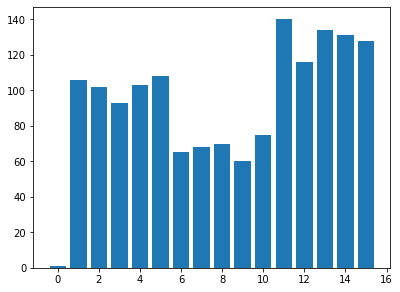

In [40]:
plt:.matplotlib.pyplot[]
plt.bar[x;y];
plt.show[];

In [41]:
histScott:.quantQ.stats.getHistogram[data;.quantQ.stats.histScott]
x:exec bins from histScott
y:exec histogram from histScott

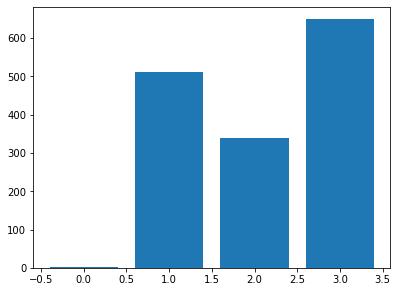

In [42]:
plt:.matplotlib.pyplot[]
plt.bar[x;y];
plt.show[];

Scotts Rule above dosn't seem useful, and indeed its not. The assumtion behind it is a normal distribution and we constructed a data from 3 uniform sets. This demonstraits the need to choose bins carefully.

#### 12.2 Firstr moments

- skewness : for datatribution that are unimodal and not heavy tailed, negitive skew is skewed to the left (lower values) and positive skew is skewed to the right (higher values)

- kurtosis : can be used to assess the heavy tail of the data. positive is said to be leptokurtic (heavy tailed) and negitive values are said to be platykurtic or relatively thin tailed compared to gaussian distribution

In [43]:
.stats.overviewStats[data]

statistics                       values      
---------------------------------------------
"Sample mean"                    1.590679    
"Sample standard deviation"      0.9197379   
"Sample skewness"                -0.1579463  
"Sample kurtosis"                -1.34855    
"Sample min"                     0.0009199788
"Sample max"                     2.994793    
"Number of observations"         1500        
"Number of missing observations" 0           


#### 12.3 Hypothsis testing
- In order to review our data quantitativly we need tests like
    - comparing two sample means
    - sign test
    - correlation

##### p -values
    - For many stats we require a Normal distribution $N(0,1)$
    - We need to form a test to make sure that assumtion holds true
    - To assess we make a null hypothesis and assess if we can reject that null hypothesis
    - In order to calculate, we use p-values
    - In order to assess the significance of the test we rely on confidence intervals

In [44]:
// Confidence intervals
.stats.normTable // zscores for different p values

0.0005 3.290527  
0.005  2.575829  
0.01   2.326348  
0.495  0.01253347
0.5    0         


In [45]:
// confidence of two sided  test
.stats.pValueTwoSided[2.58] 

0.01


In [46]:
.stats.pValueTwoSided[10.0]

0.001


In [47]:
.stats.pValueTwoSided[0.0]

1f


In [48]:
show .stats.pValueLeftSided[-2.58];
show .stats.pValueLeftSided[2.58];

0.005
0.995


In [49]:
show .stats.pValueRightSided[-2.58];
show .stats.pValueRightSided[2.58];

0.995
0.005


##### Correlation
$\rho = \frac{\text{cov}(X,Y)}{\sigma_x \sigma_y}$

 - basic tool to assess dependece between two variables
 - cov is the covariance
 - $\sigma$ are the squareroot of the variance
 - bounded by 1 and -1 with one being a positive correlation and -1 being negitive, uncorrelated is near 0
 
 
 Testing
 - Let $H_{o}$ denote the null hypothesis, that two random variables are not correlated
 - Let $H_{a}$ denote the alternitive hypothesis, that tw orandom variables are correlated
 

In [50]:
// constructing the data
x:100?1.0;
y:(0.2*x)+0.8*100?1.0;
cor[x;y]

0.357478


In [51]:
/calculate the t-statistic
.stats.tStatsCorr[cor[x;y];count x]

3.789238


In [52]:
//assess its significance level
.stats.pValueTwoSided abs .stats.tStatsCorr[cor[x;y];count x]

0.001


The results show that we can reject the Null hypothesis of the correlation being zero. The derived p-value smaller than or equal to zero.

##### t-test One sample

In [53]:
.stats.tTestOneSample[xTest:100?1.0;0.045]

16.84401


In [54]:
.stats.pValueTwoSided abs .stats.tTestOneSample[xTest;0.45]

0.01


p-value of the test is 2%, which suggest we may reject the Null hypothesis at 2% confidence interval

##### t-test Two sample

Drawn from two independent samples
- $X_{N} = x_{1} ... x_{N}$ with mean $\mu_{1}$ , and standard deviation $\sigma_{1}$
- $Y_{M} = y_{1} ... y_{M}$ with mean $\mu_{2}$ , and standard deviation $\sigma_{2}$

###### Hypothesis
- Let $H_{o}$ denote the null hypothesis, that two sample means are equal $\mu_{1} = \mu_{2}$
- Let $H_{a}$ denote the alternitive hypothesis, that tw orandom variables are correlated

To test we need a sutible test statistics. The statistics make assumtions on N, M, $\sigma_{1}$, $\sigma_{2}$. The stronger the assumtions, the closer we get to asymptotic behavior, but at a greater risk of model error if its incorrect.

We focuse on the `Welch's test`, which has the least assumtions:
    $t_{w} = \dfrac{\bar{x} - \bar{y}}{ s_{w}}$
    
We reject the null hypothesis if $|t_{W}| > t_{critical, W_{df}}$, $t_{W} < -t$, $t_{W} > t_{critical, W_{df}}$

In [55]:
/ implimentation
.stats.tTestTwoSample

{[x1;x2]
    // x1,x2 -- two arrays to be tested, unequal length
    // return Welch's statistics
    :(avg[x1]-avg[x2])%sqrt ((s*s:dev[x1])%count[x1])+(z*z:dev[x2])%count[x2];
 }


In [56]:
// test with two samples

.stats.tTestTwoSample[xTest1:100?1.0;xTest2:neg[0.5]+1000?2.0]

0.7811354


In [57]:
// p value 
.stats.pValueTwoSided abs .stats.tTestTwoSample[xTest1;xTest2]

0.99


###### Sig Test


In [58]:
/# implimentation of the Test
.stats.characteristicsBinomial

{[n;N;p]
    // N -- population size
    // n -- number of "1"
    // p -- probability of "1" in every draw
    // first four moments: mean
    mean: N*p;
    // first four moments: variance
    variance: N*p*1-p;
    // sigma -- convenient
    sigma:sqrt variance;
    // first four moments: skewness
    skewness:(1-2.0*p)%sqrt[N*p*1-p];
    // first four moments: kurtosis
    kurtosis:(1-6.0*p*1-p)%N*p*1-p;
    // the output object
     :(`mean`variance`sigma`skewness`kurtosis)!(mean;variance;sigma;skewness;..
 }


In [59]:
.stats.pdfBinomial

{[n;N;p]
    // N -- population size
    // n -- number of "1"
    // p -- probability of "1" in every draw
    :.quantQ.stats.coeffBinomial[N;n]*xexp[p;n]*xexp[1-p;N-n]
 }


In [60]:
.stats.coeffBinomial

{[a;b]
    // a, b -- integers
    // a choose b calculation
    :.quantQ.stats.factorial[a]%(.quantQ.stats.factorial[b]*.quantQ.stats.fac..
 }


In [61]:
.stats.coeffBinomial[6;3]

20f


In [62]:
.stats.factorial

{[n]
    // n  -- the integer input
    // for the purpose of calculation, the numbers are recast into float
    :prd "f"$1 + til n;
 }


In [63]:
.stats.factorial[25]

1.551121e+025


In [64]:
.stats.characteristicsBinomial[45;100;0.5]

mean    | 50
variance| 25
sigma   | 5
skewness| 0
kurtosis| -0.02


In [65]:
tabBinom:([] t:til 100)
update Binom:.stats.pdfBinomial[;100;0.5] each t from tabBinom

t  Binom        
----------------
0  7.888609e-031
1  7.888609e-029
2  3.904861e-027
3  1.275588e-025
4  3.093301e-024
5  5.939138e-023
6  9.403635e-022
7  1.262774e-020
8  1.467975e-019
9  1.500596e-018
10 1.365543e-017
11 1.117262e-016
12 8.286361e-016
13 5.609229e-015
14 3.485735e-014
15 1.998488e-013
16 1.061697e-012
17 5.246031e-012
18 2.419003e-011
19 1.043991e-010
..
